In [2]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [6]:

!pip install gradio
!pip install seaborn

ERROR: Could not find a version that satisfies the requirement pytorch-grad-cam (from versions: none)
ERROR: No matching distribution found for pytorch-grad-cam
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.9 MB/s eta 0:00:00


In [7]:
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 74.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.5-py3-none-any.whl size=44284 sha256=9ce932e1b11852244310dbbe80aada4e4732db3179cf18562769829a3016cf54
  Stored in directory: /root/.cache/pip/wheels/bc/52/78/893c3b94279ef238f43a9e89608af648de401b96415bebbd1f
Successfully built grad-cam


In [8]:
# Cell 2: Import necessary libraries
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
from ultralytics import YOLO
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
import gradio as gr

In [9]:
# Cell 2: Load YOLOv8 models
# Load your custom trained YOLOv8 models
detection_model = YOLO('/content/tunisian_lp_detector.pt')
recognition_model = YOLO('/content/best.pt')

In [10]:
# Cell 3: Helper functions for image preprocessing
def preprocess_image(image_path):
    """Preprocess image for model input"""
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def visualize_heatmap(image, heatmap, alpha=0.6):
    """Overlay heatmap on original image"""
    heatmap = cv2.resize(heatmap, (image.shape[1], image.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    output = cv2.addWeighted(image, alpha, heatmap, 1-alpha, 0)
    return output

def plot_results(image, detections, attention_map=None):
    """Plot original image with detections and attention map"""
    plt.figure(figsize=(15, 5))

    # Original image with detections
    plt.subplot(131)
    plt.imshow(image)
    for det in detections:
        x1, y1, x2, y2 = det['bbox']
        conf = det['confidence']
        cls = det['class']
        plt.gca().add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1,
                                        fill=False, color='red', linewidth=2))
        plt.text(x1, y1-5, f'{cls}: {conf:.2f}', color='red')
    plt.title('Original Image with Detections')

    if attention_map is not None:
        # Attention map
        plt.subplot(132)
        plt.imshow(attention_map)
        plt.title('Attention Map')

        # Overlaid visualization
        plt.subplot(133)
        overlaid = visualize_heatmap(image, attention_map)
        plt.imshow(overlaid)
        plt.title('Overlaid Attention Map')

    plt.tight_layout()
    plt.show()

In [11]:
# Cell 4: XAI for Detection Model
class DetectionExplainer:
    def __init__(self, model):
        self.model = model

    def generate_attention_map(self, image):
        """Generate attention map for detection using model's internal features"""
        # Get model predictions and intermediate features
        results = self.model(image, verbose=False)

        # Extract feature maps from the last layer
        feature_maps = results[0].boxes.data.cpu().numpy()

        # Create attention map from feature maps
        attention_map = np.zeros((image.shape[0], image.shape[1]))

        # Aggregate feature maps into attention map
        for box in feature_maps:
            x1, y1, x2, y2, conf, cls = box
            x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])
            attention_map[y1:y2, x1:x2] += conf

        # Normalize attention map
        attention_map = (attention_map - attention_map.min()) / (attention_map.max() - attention_map.min())
        return attention_map

    def explain_detection(self, image_path):
        # Load and preprocess image
        image = preprocess_image(image_path)

        # Get model predictions
        results = self.model(image, verbose=False)

        # Convert predictions to list of dictionaries
        detections = []
        for r in results:
            boxes = r.boxes
            for box in boxes:
                detections.append({
                    'bbox': box.xyxy[0].cpu().numpy(),
                    'confidence': box.conf[0].cpu().numpy(),
                    'class': r.names[int(box.cls[0].cpu().numpy())]
                })

        # Generate attention map
        attention_map = self.generate_attention_map(image)

        # Visualize results
        plot_results(image, detections, attention_map)

        return detections, attention_map

In [18]:
# Cell 5: XAI for Recognition Model (Improved for License Plate Character Detection)
class RecognitionExplainer:
    def __init__(self, model):
        self.model = model

    def generate_feature_importance(self, image, results):
        """Generate feature importance map for character detection and recognition"""
        importance_map = np.zeros((image.shape[0], image.shape[1]))
        recognized_chars = []

        if len(results) > 0 and hasattr(results[0], 'boxes'):
            boxes = results[0].boxes
            if len(boxes) > 0:
                boxes_data = boxes.data.cpu().numpy()
                for box in boxes_data:
                    x1, y1, x2, y2, conf, cls = box
                    x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])
                    class_id = int(cls)
                    class_name = self.model.names[class_id]
                    confidence = float(conf)
                    importance_map[y1:y2, x1:x2] += confidence
                    recognized_chars.append((x1, class_name, confidence))
                    print(f"Detected: {class_name} with confidence {confidence:.2f}")

        # Normalize importance map
        if importance_map.max() > importance_map.min():
            importance_map = (importance_map - importance_map.min()) / (importance_map.max() - importance_map.min())

        return importance_map, recognized_chars

    def explain_recognition(self, image_path):
        # Load and preprocess image
        image = preprocess_image(image_path)

        # Get model predictions
        results = self.model(image, verbose=False)

        # Generate feature importance map and get recognized characters
        importance_map, recognized_chars = self.generate_feature_importance(image, results)

        # Sort recognized characters by x1 (left to right)
        recognized_chars.sort(key=lambda x: x[0])
        recognized_string = ''.join([char for _, char, _ in recognized_chars])

        # Visualization
        plt.figure(figsize=(15, 5))

        # Original image with detections
        plt.subplot(131)
        plt.imshow(image)
        ax = plt.gca()
        if len(results) > 0 and hasattr(results[0], 'boxes'):
            boxes = results[0].boxes
            for box in boxes:
                x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
                conf = box.conf[0].cpu().numpy()
                cls = int(box.cls[0].cpu().numpy())
                class_name = self.model.names[cls]
                ax.add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, color='red', linewidth=2))
                ax.text(x1, y1-5, f'{class_name}: {conf:.2f}', color='yellow', fontsize=10, bbox=dict(facecolor='red', alpha=0.5))
        plt.title('Original Image with Detections')

        # Feature importance map
        plt.subplot(132)
        plt.imshow(importance_map, cmap='hot')
        plt.title('Feature Importance Map')

        # Overlaid visualization
        plt.subplot(133)
        overlaid = visualize_heatmap(image, importance_map)
        plt.imshow(overlaid)
        plt.title('Overlaid Feature Importance')

        plt.tight_layout()
        plt.show()

        print(f"\nRecognized License Plate (left-to-right): {recognized_string}")
        return results, importance_map, recognized_string

Testing Detection Explanation:


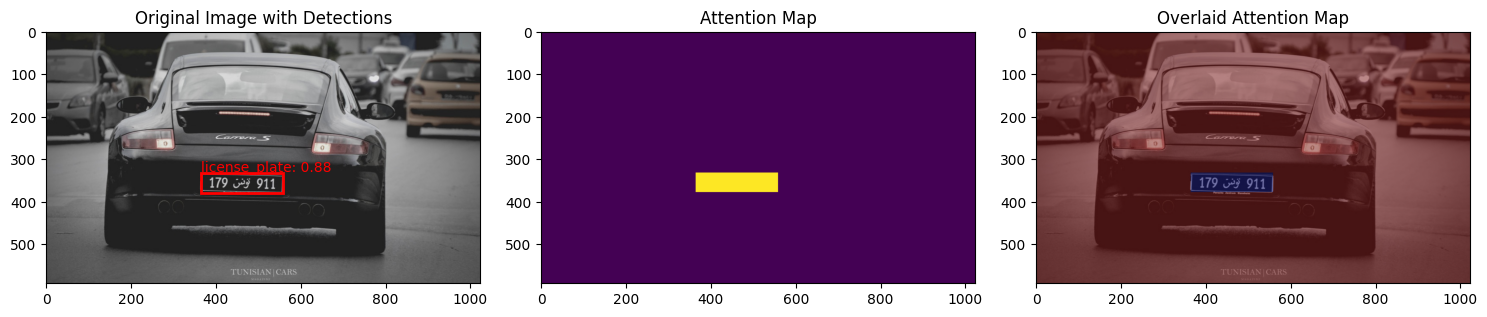


Please upload a cropped license plate image for recognition:

Testing Recognition Explanation on cropped plate:
Detected: 0 with confidence 0.96
Detected: TU with confidence 0.94
Detected: 2 with confidence 0.94
Detected: 3 with confidence 0.94
Detected: 1 with confidence 0.90
Detected: 8 with confidence 0.90
Detected: 1 with confidence 0.86
Detected: 1 with confidence 0.85


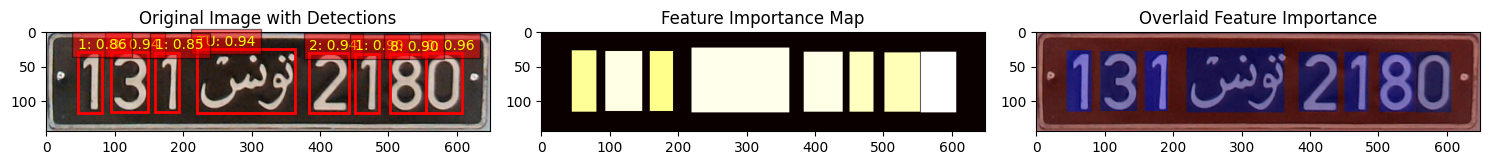


Recognized License Plate (left-to-right): 131TU2180

Detected Characters (from results):
Character: 0, Confidence: 0.96
Character: TU, Confidence: 0.94
Character: 2, Confidence: 0.94
Character: 3, Confidence: 0.94
Character: 1, Confidence: 0.90
Character: 8, Confidence: 0.90
Character: 1, Confidence: 0.86
Character: 1, Confidence: 0.85

Recognized License Plate (left-to-right): 131TU2180


In [21]:
# Cell 6: Test the XAI implementations (with upload for cropped plate)

from google.colab import files

# Initialize explainers
detection_explainer = DetectionExplainer(detection_model)
recognition_explainer = RecognitionExplainer(recognition_model)

# Test on a full image for detection
image_path_detection = '/content/100.jpg'

print("Testing Detection Explanation:")
detection_predictions, detection_attention = detection_explainer.explain_detection(image_path_detection)

# Upload a cropped license plate image for recognition
print("\nPlease upload a cropped license plate image for recognition:")
image_path_recog = '/content/Standard_Tunisian_licence_plate.jpg'


print("\nTesting Recognition Explanation on cropped plate:")
recognition_results, recognition_importance_map, recognized_string = recognition_explainer.explain_recognition(image_path_recog)

# Print all detected characters (for completeness, though already printed in the explainer)
if len(recognition_results) > 0 and hasattr(recognition_results[0], 'boxes'):
    boxes = recognition_results[0].boxes
    print("\nDetected Characters (from results):")
    for box in boxes:
        cls = int(box.cls[0].cpu().numpy())
        conf = box.conf[0].cpu().numpy()
        print(f"Character: {recognition_model.names[cls]}, Confidence: {conf:.2f}")

# Print recognized license plate string
print(f"\nRecognized License Plate (left-to-right): {recognized_string}")

In [23]:
import gradio as gr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2

def recognition_xai_gradio(image):
    # Convert PIL image to numpy array
    image_np = np.array(image)
    # Save to temp file for YOLOv8
    temp_path = "temp_plate.jpg"
    cv2.imwrite(temp_path, cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR))

    # Run recognition XAI
    results, importance_map, recognized_string = recognition_explainer.explain_recognition(temp_path)

    # Prepare table data
    recognized_chars = []
    if len(results) > 0 and hasattr(results[0], 'boxes'):
        boxes = results[0].boxes
        boxes_data = boxes.data.cpu().numpy()
        for box in boxes_data:
            x1, y1, x2, y2, conf, cls = box
            class_id = int(cls)
            class_name = recognition_model.names[class_id]
            recognized_chars.append({
                "Character": class_name,
                "Confidence": f"{conf:.2f}",
                "x1": int(x1), "y1": int(y1), "x2": int(x2), "y2": int(y2)
            })
    df = pd.DataFrame(recognized_chars)

    # Prepare images for display
    # 1. Original with detections and recognized string
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.imshow(image_np)
    if recognized_chars:
        max_conf = max([float(char["Confidence"]) for char in recognized_chars])
        for char in recognized_chars:
            color = 'lime' if float(char["Confidence"]) == max_conf else 'red'
            ax.add_patch(plt.Rectangle((char["x1"], char["y1"]), char["x2"]-char["x1"], char["y2"]-char["y1"],
                                       fill=False, color=color, linewidth=2))
            ax.text(char["x1"], char["y1"]-5, f'{char["Character"]}: {char["Confidence"]}',
                    color='yellow', fontsize=10, bbox=dict(facecolor=color, alpha=0.5))
    ax.text(10, 20, f'Recognized: {recognized_string}', color='blue', fontsize=14, bbox=dict(facecolor='white', alpha=0.7))
    ax.axis('off')
    plt.tight_layout()
    plt.savefig("detections.png")
    plt.close(fig)

    # 2. Feature importance map
    plt.figure(figsize=(6, 4))
    plt.imshow(importance_map, cmap='hot')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig("importance.png")
    plt.close()

    # 3. Overlaid feature importance
    overlaid = visualize_heatmap(image_np, importance_map)
    plt.figure(figsize=(6, 4))
    plt.imshow(overlaid)
    plt.axis('off')
    plt.tight_layout()
    plt.savefig("overlaid.png")
    plt.close()

    return (
        "detections.png",
        "importance.png",
        "overlaid.png",
        df
    )

In [24]:
gr.Interface(
    fn=recognition_xai_gradio,
    inputs=gr.Image(type="pil", label="Upload Cropped License Plate"),
    outputs=[
        gr.Image(type="filepath", label="Detections & Recognized String"),
        gr.Image(type="filepath", label="Feature Importance Map"),
        gr.Image(type="filepath", label="Overlaid Feature Importance"),
        gr.Dataframe(label="Detection Table")
    ],
    title="License Plate Character Recognition XAI",
    description="Upload a cropped license plate image to see detected characters, feature importance, and a summary table."
).launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://86c35cf5b5e4d84fc2.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
